We import MicroMagnetic and use double float precision in the simulation

In [1]:
using MicroMagnetic
using CairoMakie

In this example, the studied system is a round nanodisk. Since we are using finite different method,
we create a FDMesh with dimensions 200nm x 200nm x 20 nm.

In [2]:
mesh =  FDMesh(dx=2e-9, dy=2e-9, dz=5e-9, nx=100, ny=100, nz=4);

Create a cylindrical shape with a diameter of 100 nm

In [3]:
geo = Cylinder(radius=100e-9);

To start the simulation, we need to give an initial state.
Here we use a function to give the initial state. The function should take six parameters `(i,j,k,dx,dy,dz)`.

In [4]:
function init_fun(i,j,k,dx,dy,dz)
  x = i-50.5
  y = j-50.5
  r = (x^2+y^2)^0.5
  if r<20
    return (0,0,1)
  end
  return (y/r, -x/r, 0)
end

init_fun (generic function with 1 method)

Create a Sim instance and then relax the system

In [5]:
sim = create_sim(mesh, shape=geo, Ms=8e5, A = 1.3e-11, demag=true, m0=init_fun);
relax(sim, maxsteps=5000, stopping_dmdt=0.1)
save_vtk(sim, "vortex")

[ Info: MicroSim has been created.
[ Info: Exchange has been added.
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: step =    0  step_size=9.049774e-16  max_dmdt=8.301381e+04
[ Info: step =    1  step_size=9.186824e-13  max_dmdt=6.906170e+04
[ Info: step =    2  step_size=3.513763e-13  max_dmdt=1.224619e+05
[ Info: step =    3  step_size=2.590682e-13  max_dmdt=6.192582e+04
[ Info: step =    4  step_size=2.067183e-13  max_dmdt=2.412649e+04
[ Info: step =    5  step_size=3.812805e-13  max_dmdt=9.914355e+03
[ Info: step =    6  step_size=9.438009e-13  max_dmdt=8.063586e+03
[ Info: step =    7  step_size=2.809277e-12  max_dmdt=7.883935e+03
[ Info: step =    8  step_size=2.054424e-13  max_dmdt=6.850703e+04
[ Info: step =    9  step_size=1.873147e-13  max_dmdt=7.001177e+03
[ Info: step =   10  step_size=1.826901e-13  max_dmdt=3.286380e+03
[ Info: step =   11  step_size=1.193797e-11  max_dmdt=3.002782e+03
[ Info: step =   12  step_size=2.595546e-12  max_dmdt=6.8600

1-element Vector{String}:
 "vortex.vts"

We plot the magnetization distribution using the plot_m function

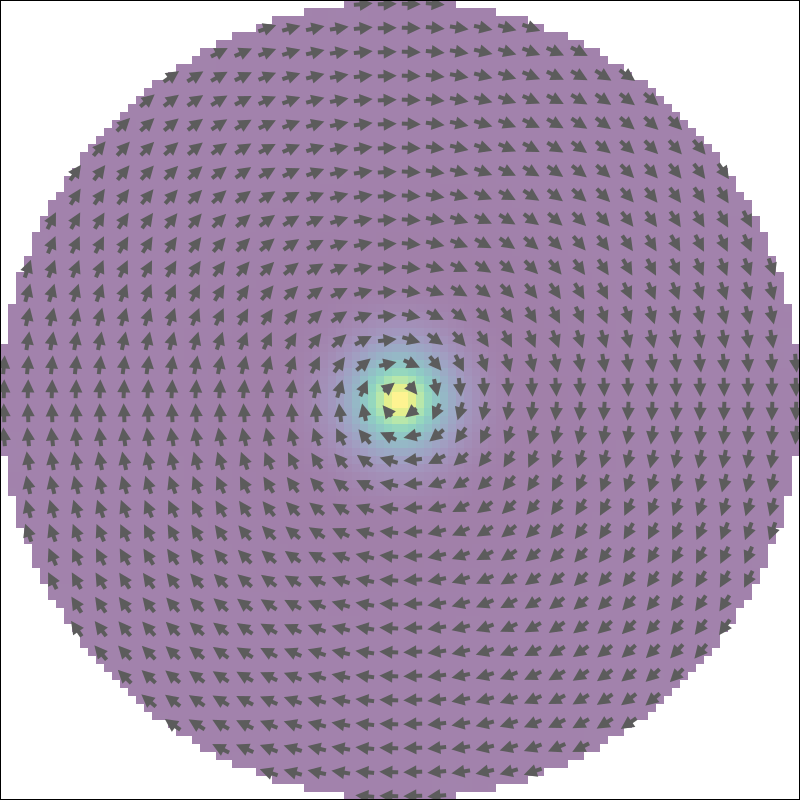

In [6]:
plot_m(sim, figsize=(400, 400), arrows=(30,30))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*